In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.ensemble import AdaBoostClassifier  # adaboost引入方法
from sklearn.tree import DecisionTreeClassifier  # 决策树
from sklearn.datasets import make_gaussian_quantiles  # 造数据

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
## 创建数据 生成高斯分布的数据
X1, y1 = make_gaussian_quantiles(cov=2.,                       # 样本协方差的系数
                                 n_samples=200, n_features=2,  # 生成样本数、正态分布的维数
                                 n_classes=2, random_state=1)  # 数据在正态分布中按分位数分配的组数
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,         # mean（特征均值）
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

print('X1,y1 shape:\n', X1.shape, y1.shape)
print('X2,y2 shape:\n', X2.shape, y2.shape)

X1,y1 shape:
 (200, 2) (200,)
X2,y2 shape:
 (300, 2) (300,)


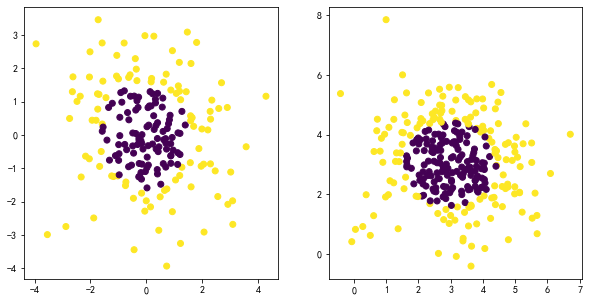

In [5]:
# 生成的数据绘制
plt.figure(figsize=(10, 5), facecolor='w')
# 局部子图
plt.subplot(121)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1)
plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2)
plt.show()

In [14]:
# np.concatenate 数组拼接
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (500, 2)
y shape: (500,)


In [7]:
# 构建adaboost模型
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",  # 可以不写
                         n_estimators=200)
# 数据量大的时候，可以增加内部分类器的树深度，也可以不限制树深
# max_depth树深，数据量大的时候，一般范围在10——100之间
# 数据量小的时候，一般可以设置树深度较小，或者n_estimators较小
# n_estimators 迭代次数或者最大弱分类器数：200次
# base_estimator：DecisionTreeClassifier 选择弱分类器，默认为CART树
# algorithm：SAMME 和SAMME.R 。运算规则，后者是优化算法，以概率调整权重，迭代速度快，需要能计算概率的分类器支持
# learning_rate：0<v<=1，默认为1，正则项 衰减指数
# loss：linear、‘square’exponential’。误差计算公式：一般用linear足够
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [8]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print("x_min:", x_min, "\n", "x_max:", x_max, "\n", "y_min:", y_min, "\n", "y_max:", y_max)

x_min: -4.950018688068095 
 x_max: 7.712026704298365 
 y_min: -4.935097981925363 
 y_max: 8.848278359647372


In [12]:
# meshgrid:根据传入的两个一维数组参数生成两个数组元素的列表
a, b = np.meshgrid(np.array([1,2,3]), np.array([4,5,6,7,8]))
print("meshgrid 示例：\n", 'a:\n', a, '\nb:\n', b)
# np.c_ 按行连接两个矩阵，即把两个矩阵左右相加
print('a.ravle():\n', a.ravel())
print('np.c_示例：\n', np.c_[a.ravel(), b.ravel()])

meshgrid 示例：
 a:
 [[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]] 
b:
 [[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]]
a.ravle():
 [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
np.c_示例：
 [[1 4]
 [2 4]
 [3 4]
 [1 5]
 [2 5]
 [3 5]
 [1 6]
 [2 6]
 [3 6]
 [1 7]
 [2 7]
 [3 7]
 [1 8]
 [2 8]
 [3 8]]


In [13]:
# 生成数据
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
print("xx's shape:", xx.shape)
print("yy's shape:", yy.shape)

# 预测
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
# 设置维度
Z = Z.reshape(xx.shape)

xx's shape: (690, 634)
yy's shape: (690, 634)


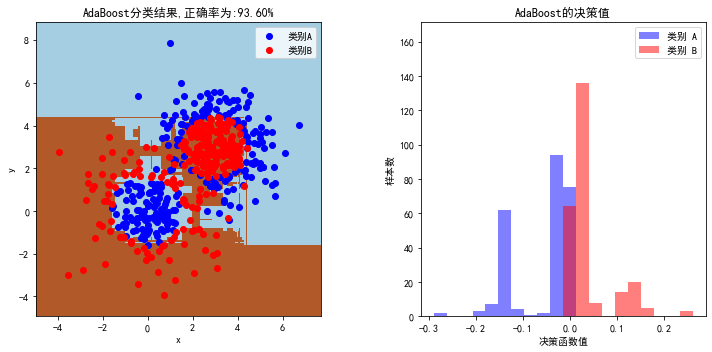

In [16]:
## 画图
plot_colors = "br"
class_names = "AB"

plt.figure(figsize=(10, 5), facecolor='w')
# 局部子图
plt.subplot(121)
## 绘制分类图,能够直观表现出分类边界
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# 只进行两次循环
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)  # 输出满足条件的坐标 0/1 
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label=u"类别%s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title(u'AdaBoost分类结果,正确率为:%.2f%%' % (bdt.score(X, y) * 100))

# 获取决策函数的数值 最终的决策函数
twoclass_output = bdt.decision_function(X)
# 获取范围
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
# 直方图
    plt.hist(twoclass_output[y == i],
             bins=20,
             range=plot_range,
             facecolor=c,
             label=u'类别 %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel(u'样本数')
plt.xlabel(u'决策函数值')
plt.title(u'AdaBoost的决策值')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()